<a href="https://colab.research.google.com/github/SriPorwal/PythonProjects/blob/main/Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 150MB/s]


In [ ]:
df = pd.read_csv("cars24-car-price-cleaned.csv")
df.shape

(19820, 18)

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df['model'].nunique()

3233

In [ ]:
df['make'].nunique()

41

In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
X = df.drop('selling_price', axis = 1)
y = df['selling_price']

X.shape, y.shape

((19820, 17), (19820,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Random data points are split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((15856, 17), (15856,))

In [ ]:
X_test.shape, y_test.shape

((3964, 17), (3964,))

In [ ]:
X_train1 = X_train[['model']]
X_test1 = X_test[['model']]

In [ ]:
# df.corr()

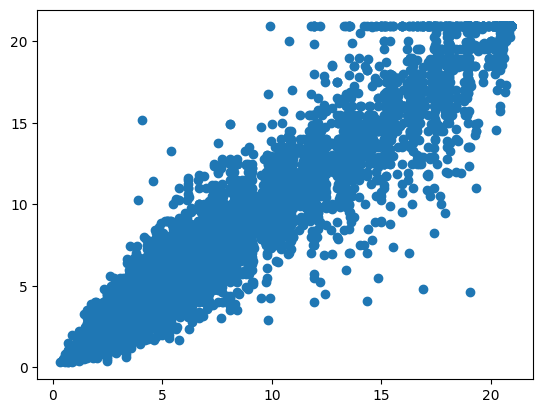

In [ ]:
plt.scatter(X_train1, y_train)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
# model is trained
# the perfect line is found.
model.fit(X_train1, y_train)

LinearRegression()

In [ ]:
# weights
model.coef_

array([0.99932633])

In [ ]:
model.intercept_

0.003851586536288032

In [ ]:
# y = 0.99*x + 0.003

In [ ]:
model.predict([[2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.00250426])

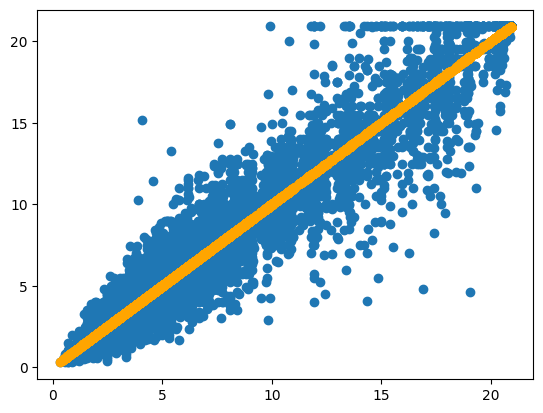

In [ ]:
plt.scatter(X_train1, y_train)
plt.scatter(X_train1, model.predict(X_train1), c='orange')
plt.show()

In [ ]:
model.predict(X_train1)

array([ 3.7763085 , 10.92024263,  6.88207199, ...,  4.29470904,
        7.66022873,  5.10755394])

In [ ]:
model.predict(X_train1)[:10]

array([ 3.7763085 , 10.92024263,  6.88207199,  5.61257064,  2.84252622,
        7.74863068,  5.12982464,  5.96328876,  1.18705397,  2.18591003])

In [ ]:
y_train[:10]

5662     5.25
4556     8.25
7094     7.50
1441     5.70
17079    4.00
8687     7.50
16301    4.85
19537    6.35
10004    0.90
5248     2.75
Name: selling_price, dtype: float64

In [ ]:
model.score(X_train1, y_train)

0.9361429280197991

In [ ]:
model.score(X_test1, y_test)

0.940979262430343

In [ ]:
# MAE
np.abs( y_train - model.predict(X_train1) ).mean()

0.7769026891139283

In [ ]:
# MSE

np.square(y_train - model.predict(X_train1)).mean()

1.489497038263128

In [ ]:
# Train the algorithm with X_train, y_train



# Check the performance on the Test data.

# Multi-variate Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5662,2013.0,80000,20.54,1598.0,103.6,10.0,5.540306,3.775000,1,0,1,0,0,0,1,1,0
4556,2010.0,97547,16.07,1995.0,181.0,13.0,17.349017,10.923750,0,0,1,0,0,0,0,1,0
7094,2018.0,74000,27.39,1248.0,74.0,5.0,4.684721,6.882857,1,0,1,0,0,0,1,1,0
1441,2019.0,15000,23.84,1199.0,84.0,4.0,4.381194,5.612500,1,0,0,0,0,1,1,1,0
17079,2008.0,110000,13.50,1799.0,130.0,15.0,5.979902,2.840588,1,0,0,0,0,1,1,1,0


In [ ]:
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
960,2017.0,80000,21.64,1461.0,84.8,6.0,4.606651,4.442857,1,0,1,0,0,0,1,1,0
4073,2015.0,61500,20.14,1498.0,88.8,8.0,5.540306,5.031429,0,0,1,0,0,0,1,1,0
4339,2016.0,71400,27.30,1498.0,98.6,7.0,5.979902,5.612500,0,0,1,0,0,0,1,1,0
19325,2016.0,30412,18.70,1199.0,88.7,7.0,5.979902,5.754167,0,0,0,0,0,1,1,1,0
438,2012.0,60000,20.92,998.0,67.1,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0


In [ ]:
X_train.shape

(15856, 17)

In [ ]:
y_train.head()


5662     5.25
4556     8.25
7094     7.50
1441     5.70
17079    4.00
Name: selling_price, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.724138,0.053808,0.142586,0.236671,0.158776,0.275862,0.236566,0.167659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.620690,0.065625,0.104052,0.295468,0.283414,0.379310,0.823407,0.515065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.896552,0.049768,0.201638,0.184834,0.111111,0.103448,0.194048,0.318691,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.931034,0.010034,0.171034,0.177577,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.551724,0.074012,0.081897,0.266440,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.862069,0.053808,0.152069,0.216380,0.128502,0.137931,0.190168,0.200115,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.793103,0.041350,0.139138,0.221860,0.134944,0.206897,0.236566,0.228717,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.827586,0.048017,0.200862,0.221860,0.150725,0.172414,0.258412,0.256955,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.827586,0.020413,0.126724,0.177577,0.134783,0.172414,0.258412,0.263840,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.689655,0.040339,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_.round(3)

array([ 1.45098342e+13, -4.69100000e+00, -5.12800000e+00,  1.78500000e+00,
        6.86000000e-01,  1.45098342e+13,  1.39400000e+00,  1.76700000e+01,
       -1.22000000e-01, -1.65000000e-01,  1.20000000e-01,  2.55400000e+00,
        3.08000000e-01, -2.06000000e-01, -8.90000000e-02, -2.53000000e-01,
       -4.21000000e-01])

In [ ]:
model.intercept_

-14509834200315.713

In [ ]:
model.score(X_train, y_train)

0.9454978152791966

In [ ]:
model.score(X_test, y_test)

0.946742406672308

In [ ]:
import seaborn as sns

In [ ]:
imps = np.abs(model.coef_).round(3)
imps

array([1.45098342e+13, 4.69100000e+00, 5.12800000e+00, 1.78500000e+00,
       6.86000000e-01, 1.45098342e+13, 1.39400000e+00, 1.76700000e+01,
       1.22000000e-01, 1.65000000e-01, 1.20000000e-01, 2.55400000e+00,
       3.08000000e-01, 2.06000000e-01, 8.90000000e-02, 2.53000000e-01,
       4.21000000e-01])

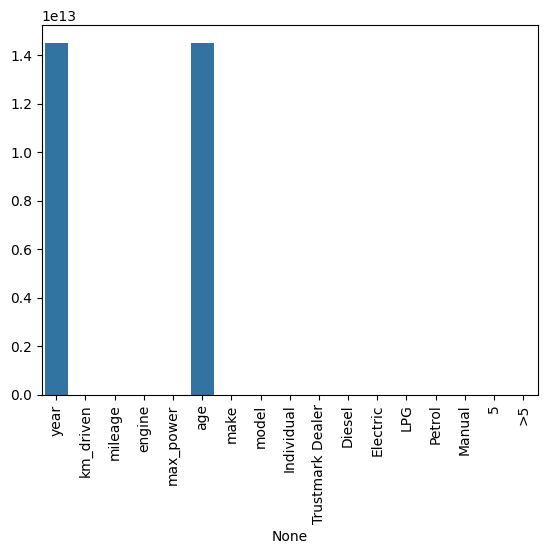

In [ ]:
sns.barplot(x = X_train.columns, y = imps)
plt.xticks(rotation=90)
plt.show()

In [ ]:
class MyLinearRegression() :
    def __init__(self, learning_rate=0.01, iterations=20):
        self.learning_rate = learning_rate
        self.iterations = iterations


    def predict(self, X):
        return np.dot(X, self.W) + self.w0

    def r2_score(self, X, y):
        y_ = self.predict(X)

        ss_res = np.sum((y-y_)**2)
        ss_tot = np.sum((y- y.mean())**2)

        score = 1 - (ss_res/ss_tot)
        return score


    def update_weights(self):
        Y_pred = self.predict( self.X )

        # calculate gradients
        dW =  (2*(self.X.T ).dot(Y_pred - self.Y  ))/self.n

        dw0 =  2*np.sum(Y_pred - self.Y )/self.n

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.w0 = self.w0 - self.learning_rate * dw0

        return self

    def fit(self, X, Y):
        # no_of_training_examples, no_of_features

        self.n, self.d = X.shape

        # weight initialization
        self.W = np.zeros((self.d, 1))
        self.w0 = 0
        self.X = X
        self.Y = Y
        self.error_list=[]

        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()

            Y_pred = X.dot(self.W)+self.w0

            error = np.mean((Y-Y_pred)**2)

            self.error_list.append(error)

        return self



In [ ]:
X_train =  X_train.values
X_train.shape

(15856, 17)

In [ ]:
y_train = y_train.values
y_train.shape

(15856,)

In [ ]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(15856, 1)

In [ ]:
my_model = MyLinearRegression(learning_rate=0.2, iterations=300)
my_model.fit(X_train, y_train)

In [ ]:
my_model.W.round(2)

array([[ 3.38],
       [-0.83],
       [-0.79],
       [ 1.93],
       [ 2.78],
       [-3.84],
       [ 4.09],
       [14.37],
       [-0.17],
       [-0.07],
       [ 0.03],
       [ 0.03],
       [ 0.07],
       [-0.26],
       [-0.48],
       [-0.45],
       [-0.24]])

In [ ]:
my_model.w0

-0.46065115826579695

In [ ]:
my_model.r2_score(X_train, y_train)

0.939268826954847

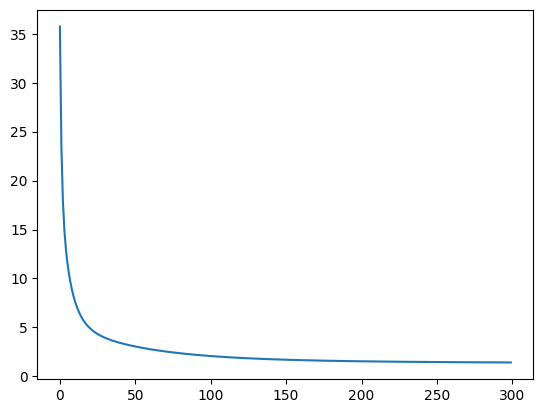

In [ ]:
plt.plot(my_model.error_list)

In [ ]:
X_test =  X_test.values
X_test.shape

(3964, 17)

In [ ]:
y_test = y_test.values.reshape(-1, 1)
y_test.shape

(3964, 1)

In [ ]:
my_model.r2_score(X_test, y_test)

0.9434648684649733

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# R2 Score
r2 = model.score(X_train, y_train)
r2

0.9454978152791966

In [ ]:
model.score(X_test, y_test)

0.946742406672308

In [ ]:
n, d = X_train.shape
n, d

(15856, 17)

In [ ]:
something  = (1- r2)*(n-1)/(n-d-1)
adj_r2 = 1 - (something)
print(adj_r2)

0.9454393143863912


In [ ]:
# impact of 'd'

something  = (1- r2)*(n-1)/(n-1000-1)
adj_r2 = 1 - (something)
print(adj_r2)

0.9418288698250867


### Statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
# Statmodels default is without intercept, to add intercept we need to add constant.
X_sm = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_sm)
results = model.fit()


# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.713e+04
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:30:46   Log-Likelihood:                -24421.
No. Observations:               15856   AIC:                         4.888e+04
Df Residuals:                   15839   BIC:                         4.901e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.835e+12   1.84e+12     -4.258      0.0

## Multicolinearity

In [ ]:
# statsmodel

In [ ]:
# X_train, y_train, X_test, y_test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.columns[1:]

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'make',
       'model', 'Individual', 'Trustmark Dealer', 'Diesel', 'Electric', 'LPG',
       'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [ ]:
X_t = pd.DataFrame(X_train, columns=df.columns[1:])

vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,206.91
5,age,20.69
13,Petrol,16.79
10,Diesel,15.87
16,>5,13.32
15,5,12.11
3,engine,6.33
7,model,6.14
4,max_power,5.11
6,make,3.26


In [ ]:
# X_t
X_t.drop(columns = ['year'], inplace = True)

In [ ]:
X_t.head()

,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.053808,0.142586,0.236671,0.158776,0.275862,0.236566,0.167659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.065625,0.104052,0.295468,0.283414,0.379310,0.823407,0.515065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.049768,0.201638,0.184834,0.111111,0.103448,0.194048,0.318691,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.010034,0.171034,0.177577,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.074012,0.081897,0.266440,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,5,50.93
2,engine,50.53
3,max_power,27.37
9,Diesel,26.81
12,Petrol,22.47
1,mileage,22.44
6,model,16.74
5,make,11.56
15,>5,10.89
13,Manual,8.81


In [ ]:
X_t.drop(columns = ['5'], inplace = True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,engine,47.50
3,max_power,27.09
9,Diesel,23.35
12,Petrol,16.87
1,mileage,16.54
6,model,16.52
5,make,11.56
4,age,8.63
13,Manual,8.61
0,km_driven,3.63


In [ ]:
X_t.drop(columns = ['engine'], inplace = True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Diesel,20.41
2,max_power,17.02
5,model,16.35
1,mileage,16.22
11,Petrol,15.32
4,make,11.43
12,Manual,8.37
3,age,8.27
0,km_driven,3.57
6,Individual,1.79


In [ ]:
X_t.drop(columns = ['Diesel'], inplace = True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,max_power,16.21
5,model,15.60
4,make,11.43
1,mileage,10.32
11,Manual,7.89
3,age,7.46
0,km_driven,3.53
10,Petrol,2.14
6,Individual,1.77
12,>5,1.64


In [ ]:
model = LinearRegression()
model.fit(X_t, y_train)


LinearRegression()

In [ ]:
model.score(X_t, y_train)

0.9451898250472941

In [ ]:
# X_t

In [ ]:
y_hat = model.predict(X_t)

In [ ]:
errs = y_train - y_hat
errs[:5]

array([[ 1.4212916 ],
       [-2.64320066],
       [ 0.61989686],
       [-0.25023319],
       [ 1.83812196]])

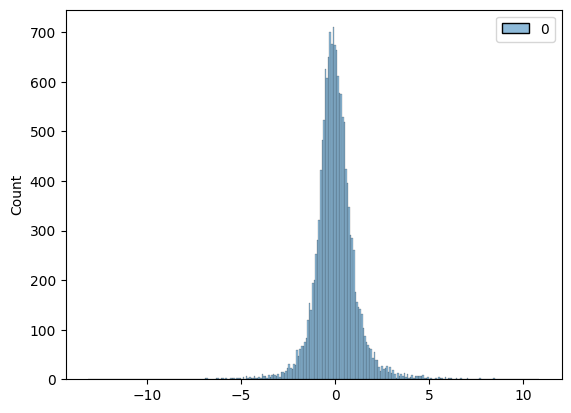

In [ ]:
sns.histplot(errs)
plt.show()

In [ ]:
# QQplot
# Shapiro

In [ ]:
from scipy import stats
res = stats.shapiro(errs)
res.statistic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.8991931676864624

In [ ]:
# closer the valye to 1, more is the normality.

In [ ]:
res.pvalue

0.0

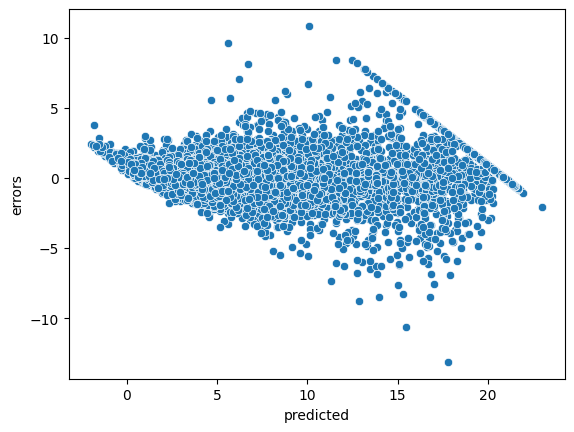

In [ ]:
sns.scatterplot(x = y_hat.reshape(-1,), y= errs.reshape(-1, ))
plt.xlabel("predicted")
plt.ylabel("errors")
plt.show()